In [34]:
import numpy as np
import pandas as pd

# 1.查看数据特征

In [35]:
inputfile = 'GoodsOrder.csv'
data = pd.read_csv(inputfile)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43367 non-null  int64 
 1   Goods   43367 non-null  object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


In [36]:
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [37]:
data = data['id']
description = [data.count(),data.min(), data.max()]  # 依次计算总数、最小值、最大值
description = pd.DataFrame(description, index = ['Count','Min', 'Max']).T  # 将结果存入数据框
print('描述性统计结果：\n',np.round(description))  # 输出结果

描述性统计结果：
    Count  Min   Max
0  43367    1  9835


# 2.分析热销商品

# 2.1 对商品进行分类汇总

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv("GoodsOrder.csv")

In [40]:
group = data.groupby(['Goods']).count().reset_index()
group.head()

,Goods,id
0,一般清洁剂,189
1,一般肉类,254
2,一般饮料,256
3,人造黄油,576
4,仁果类水果,744


In [41]:
sorted = group.sort_values('id', ascending=False)
sorted.head(10)

,Goods,id
7,全脂牛奶,2513
8,其他蔬菜,1903
155,面包卷,1809
134,苏打,1715
150,酸奶,1372
99,瓶装水,1087
70,根茎类蔬菜,1072
85,热带水果,1032
143,购物袋,969
160,香肠,924


## 2.2 可视化分析

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
x = sorted[:10]['Goods']
x

7       全脂牛奶
8       其他蔬菜
155      面包卷
134       苏打
150       酸奶
99       瓶装水
70     根茎类蔬菜
85      热带水果
143      购物袋
160       香肠
Name: Goods, dtype: object

In [44]:
y = sorted[0:10]['id']
y

7      2513
8      1903
155    1809
134    1715
150    1372
99     1087
70     1072
85     1032
143     969
160     924
Name: id, dtype: int64

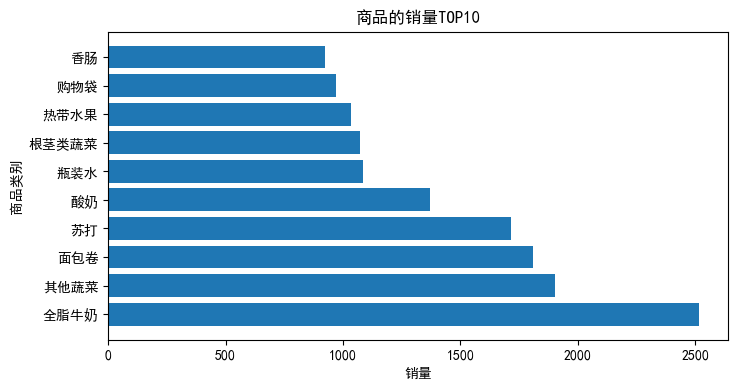

In [45]:
plt.figure(figsize=(8, 4))
plt.barh(x, y)
plt.xlabel("销量")
plt.ylabel("商品类别")
plt.title("商品的销量TOP10")
plt.savefig("./tmp/top10.png")
plt.show()

# 2.3 销量排行前10商品销量占比

In [46]:
data_nums = data.shape[0]
data_nums

43367

In [47]:
for idnex, row in sorted[:10].iterrows():
    print(row['Goods'], row['id'], row['id']/data_nums)

全脂牛奶 2513 0.05794728710770863
其他蔬菜 1903 0.0438812922268084
面包卷 1809 0.04171374547466968
苏打 1715 0.039546198722530956
酸奶 1372 0.031636958978024765
瓶装水 1087 0.025065141697604168
根茎类蔬菜 1072 0.024719256577582033
热带水果 1032 0.023796896257523
购物袋 969 0.022344178753430026
香肠 924 0.021306523393363617


# 3.各类别商品的销量及占比

In [48]:
import pandas as pd

In [49]:
inputfile1 = 'GoodsOrder.csv'
inputfile2 = 'GoodsTypes.csv'
data = pd.read_csv(inputfile1)
types = pd.read_csv(inputfile2)

In [50]:
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [51]:
types.head()

,Goods,Types
0,白饭,熟食
1,白酒,酒精饮料
2,白兰地,酒精饮料
3,白面包,西点
4,半成品面包,西点


In [52]:
group = data.groupby(['Goods']).count().reset_index()
group.head()

,Goods,id
0,一般清洁剂,189
1,一般肉类,254
2,一般饮料,256
3,人造黄油,576
4,仁果类水果,744


In [53]:
sort = group.sort_values('id', ascending=False).reset_index()
sort.head()

,index,Goods,id
0,7,全脂牛奶,2513
1,8,其他蔬菜,1903
2,155,面包卷,1809
3,134,苏打,1715
4,150,酸奶,1372


In [54]:
data_nums = data.shape[0]
data_nums

43367

In [55]:
del sort['index'] # 删除索引
sort.head()

,Goods,id
0,全脂牛奶,2513
1,其他蔬菜,1903
2,面包卷,1809
3,苏打,1715
4,酸奶,1372


In [56]:
sort_links = pd.merge(sort, types)
sort_links.head()

,Goods,id,Types
0,全脂牛奶,2513,非酒精饮料
1,其他蔬菜,1903,果蔬
2,面包卷,1809,西点
3,苏打,1715,非酒精饮料
4,酸奶,1372,食品类


## 3.1 根据类别求和并排序

In [57]:
sort_link = sort_links.groupby(['Types']).sum().reset_index()
sort_link.head()

,Types,Goods,id
0,果蔬,其他蔬菜根茎类蔬菜热带水果柑橘类水果仁果类水果冷冻蔬菜莓果洋葱葡萄包装水果/蔬菜冷冻土豆制品...,7146
1,熟食,意大利面即食食品白饭汤类成品糖水小吃类食品马铃薯产品即食汤,541
2,百货,购物袋报纸餐巾卫生用品特制门锁猫食一般清洁剂碗碟盆栽季节性商品保鲜膜/袋厨房清洁剂花卉种子卷...,5141
3,米粮调料,酸奶油人造黄油黄油凝乳糖冷冻餐饭油发酵粉面粉融化奶酪香草罐头鱼芥末水果奶油涂抹酱罐头蔬菜盐炼...,5185
4,肉类,香肠本地蛋类冷冻热狗肠猪肉牛肉鸡汉堡肉火腿一般肉类冷冻鱼冷冻甜点火鸡肉泥鱼有机香肠冷冻鸡肉,4870


In [58]:
sort_link = sort_link.sort_values('id', ascending=False).reset_index()
sort_link.head()

,index,Types,Goods,id
0,8,非酒精饮料,全脂牛奶苏打瓶装水水果/蔬菜汁咖啡超高温杀菌的牛奶其他饮料一般饮料速溶咖啡茶可可饮料,7594
1,5,西点,面包卷糕点黑面包白面包奶油乳酪威化饼咸点心长面包甜点酪硬奶酪切片奶酪半成品面包软奶酪风味蛋糕...,7192
2,0,果蔬,其他蔬菜根茎类蔬菜热带水果柑橘类水果仁果类水果冷冻蔬菜莓果洋葱葡萄包装水果/蔬菜冷冻土豆制品...,7146
3,3,米粮调料,酸奶油人造黄油黄油凝乳糖冷冻餐饭油发酵粉面粉融化奶酪香草罐头鱼芥末水果奶油涂抹酱罐头蔬菜盐炼...,5185
4,2,百货,购物袋报纸餐巾卫生用品特制门锁猫食一般清洁剂碗碟盆栽季节性商品保鲜膜/袋厨房清洁剂花卉种子卷...,5141


In [59]:
del sort_link['index']
sort_link.head()

,Types,Goods,id
0,非酒精饮料,全脂牛奶苏打瓶装水水果/蔬菜汁咖啡超高温杀菌的牛奶其他饮料一般饮料速溶咖啡茶可可饮料,7594
1,西点,面包卷糕点黑面包白面包奶油乳酪威化饼咸点心长面包甜点酪硬奶酪切片奶酪半成品面包软奶酪风味蛋糕...,7192
2,果蔬,其他蔬菜根茎类蔬菜热带水果柑橘类水果仁果类水果冷冻蔬菜莓果洋葱葡萄包装水果/蔬菜冷冻土豆制品...,7146
3,米粮调料,酸奶油人造黄油黄油凝乳糖冷冻餐饭油发酵粉面粉融化奶酪香草罐头鱼芥末水果奶油涂抹酱罐头蔬菜盐炼...,5185
4,百货,购物袋报纸餐巾卫生用品特制门锁猫食一般清洁剂碗碟盆栽季节性商品保鲜膜/袋厨房清洁剂花卉种子卷...,5141


## 3.2 求百分比

In [60]:
sort_link['count'] = sort_link.apply(lambda line: line['id']/data_nums, axis=1)
sort_link.head()

,Types,Goods,id,count
0,非酒精饮料,全脂牛奶苏打瓶装水水果/蔬菜汁咖啡超高温杀菌的牛奶其他饮料一般饮料速溶咖啡茶可可饮料,7594,0.175110
1,西点,面包卷糕点黑面包白面包奶油乳酪威化饼咸点心长面包甜点酪硬奶酪切片奶酪半成品面包软奶酪风味蛋糕...,7192,0.165840
2,果蔬,其他蔬菜根茎类蔬菜热带水果柑橘类水果仁果类水果冷冻蔬菜莓果洋葱葡萄包装水果/蔬菜冷冻土豆制品...,7146,0.164780
3,米粮调料,酸奶油人造黄油黄油凝乳糖冷冻餐饭油发酵粉面粉融化奶酪香草罐头鱼芥末水果奶油涂抹酱罐头蔬菜盐炼...,5185,0.119561
4,百货,购物袋报纸餐巾卫生用品特制门锁猫食一般清洁剂碗碟盆栽季节性商品保鲜膜/袋厨房清洁剂花卉种子卷...,5141,0.118546


In [61]:
sort_link.rename(columns={'count': 'percent'}, inplace=True)
sort_link

,Types,Goods,id,percent
0,非酒精饮料,全脂牛奶苏打瓶装水水果/蔬菜汁咖啡超高温杀菌的牛奶其他饮料一般饮料速溶咖啡茶可可饮料,7594,0.175110
1,西点,面包卷糕点黑面包白面包奶油乳酪威化饼咸点心长面包甜点酪硬奶酪切片奶酪半成品面包软奶酪风味蛋糕...,7192,0.165840
2,果蔬,其他蔬菜根茎类蔬菜热带水果柑橘类水果仁果类水果冷冻蔬菜莓果洋葱葡萄包装水果/蔬菜冷冻土豆制品...,7146,0.164780
3,米粮调料,酸奶油人造黄油黄油凝乳糖冷冻餐饭油发酵粉面粉融化奶酪香草罐头鱼芥末水果奶油涂抹酱罐头蔬菜盐炼...,5185,0.119561
4,百货,购物袋报纸餐巾卫生用品特制门锁猫食一般清洁剂碗碟盆栽季节性商品保鲜膜/袋厨房清洁剂花卉种子卷...,5141,0.118546
5,肉类,香肠本地蛋类冷冻热狗肠猪肉牛肉鸡汉堡肉火腿一般肉类冷冻鱼冷冻甜点火鸡肉泥鱼有机香肠冷冻鸡肉,4870,0.112297
6,酒精饮料,瓶装啤酒罐装啤酒粉红葡萄酒白酒烈酒开胃酒起泡酒朗姆酒白兰地普罗赛克葡萄酒威士忌酒,2287,0.052736
7,食品类,酸奶特色巧克力腌菜小食,1870,0.043120
8,零食,巧克力糖果冰淇淋口香糖巧克力棉花糖爆米花坚果/李子坚果小吃,1459,0.033643
9,熟食,意大利面即食食品白饭汤类成品糖水小吃类食品马铃薯产品即食汤,541,0.012475


In [62]:
outfile1 = "./tmp/percent.csv"
sort_link.to_csv(outfile1, index=False, header=True)

## 3.3 可视化分析

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

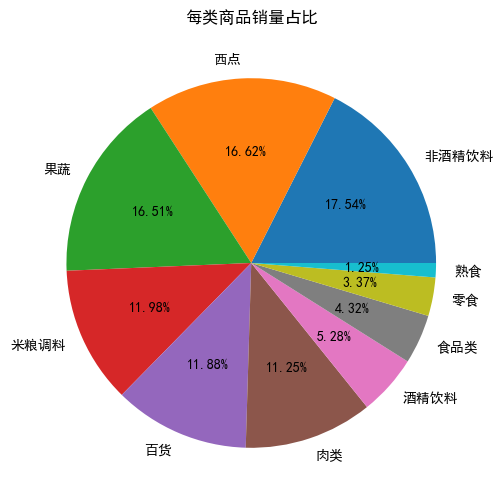

In [64]:
data = sort_link['percent']
labels = sort_link['Types']
plt.figure(figsize=(8, 6))  # 设置画布大小
plt.pie(data,labels=labels,autopct='%1.2f%%')
plt.title('每类商品销量占比')  # 设置标题
plt.savefig('./tmp/persent.png')  # 把图片以.png格式保存
plt.show()

# 4.非酒精饮料内部商品的销量及占比

In [73]:
selected = sort_links.loc[sort_links['Types'] == '果蔬']  
child_nums = selected['id'].sum()  
selected['child_percent'] = selected.apply(lambda line: line['id']/child_nums,axis = 1)  # 求百分比
selected.rename(columns = {'id':'count'}, inplace = True)
print('果蔬内部商品的销量及其占比:\n', selected)
outfile2 = './tmp/child_percent.csv'
sort_link.to_csv(outfile2,index = False,header = True)  # 输出结果

果蔬内部商品的销量及其占比:
        Goods  count Types  child_percent
1       其他蔬菜   1903    果蔬       0.266303
6      根茎类蔬菜   1072    果蔬       0.150014
7       热带水果   1032    果蔬       0.144416
11     柑橘类水果    814    果蔬       0.113910
15     仁果类水果    744    果蔬       0.104114
29      冷冻蔬菜    473    果蔬       0.066191
39        莓果    327    果蔬       0.045760
42        洋葱    305    果蔬       0.042681
57        葡萄    220    果蔬       0.030786
75   包装水果/蔬菜    128    果蔬       0.017912
96    冷冻土豆制品     83    果蔬       0.011615
148     特色蔬菜     17    果蔬       0.002379
149     有机蔬菜     16    果蔬       0.002239
153     冷冻水果     12    果蔬       0.001679


/tmp/ipykernel_40286/2659058431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['child_percent'] = selected.apply(lambda line: line['id']/child_nums,axis = 1)  # 求百分比
/tmp/ipykernel_40286/2659058431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.rename(columns = {'id':'count'}, inplace = True)


## 4.1 可视化分析

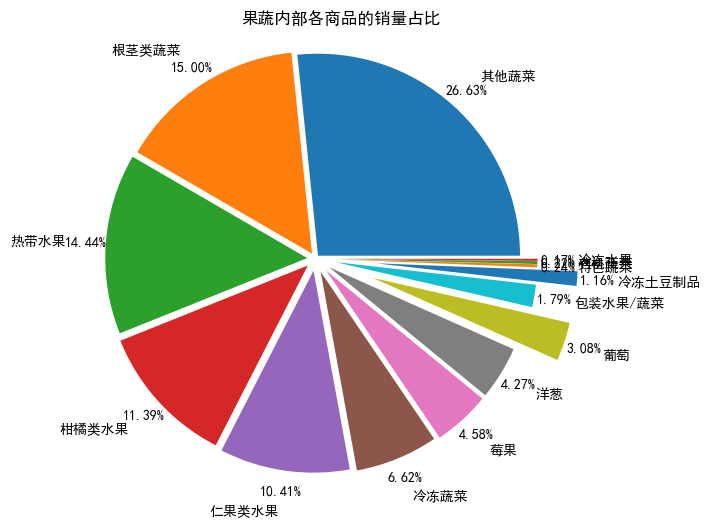

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
data = selected['child_percent']
labels = selected['Goods']
plt.figure(figsize = (8,6))  # 设置画布大小
explode = (0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.08,0.3,0.1,0.3,0.1,0.1,0.1)  # 设置每一块分割出的间隙大小
plt.pie(data,explode = explode,labels = labels,autopct = '%1.2f%%',
        pctdistance = 1.1,labeldistance = 1.2)
plt.title("果蔬内部各商品的销量占比")  # 设置标题
plt.axis('equal')
plt.savefig('./tmp/child_persent.png')  # 保存图形
plt.show()  # 展示图形